# Lösung zu Aufgabe 4, Polynom-Koeffizienten anpassen mit Gradientenabstieg

### eine mögliche Lösung von Jan Salmen

### Aufgabe -> siehe Folie 94 (Vorlesung03)

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Berechnet das Ergebnis der Polygon-Funktion. Koeffizienten in der Reihenfolge a_0, a_1 (für x), a_2 (für x^2), usw.
def polyRes(vCoeffs, x):
    toRet = 0
    for i, a in enumerate (vCoeffs):
        toRet = toRet + a * x**i
    return toRet
    

points = [ [1, 1], [3, 4], [6, 2], [7, 3] ]

In [2]:
degree = 3  # Grad des Poylnoms, das angepasst werden soll

coeffs = np.random.uniform(-0.2, 0.2, degree+1)

learnRate = 0.00001
nEpoches = 10000000

developmentL = []

for epoche in range(0, nEpoches):
    g = (degree+1)*[0]             # Zusammengefasster Gradient aus Mini-Batch
    lEpoche = 0                    # Fehler in aktueller Epoche (gemittelt über alle Punkte)
    for pt in points:
        x=pt[0]
        y=pt[1]
        yHat = polyRes(coeffs, x)
        L = 0.5*(yHat-y)**2       # Fehler: Ausgabe des Modells vs. tatsächlicher y-Wert des betrachteten Punkts
        lEpoche = lEpoche + L
    
        for i in range(0, degree+1):
            g[i] = g[i] + (yHat-y)*x**i  # partielle Ableitung nach a_i: (yHat-y)*x^i
            
    developmentL.append( lEpoche )
    
    if (epoche % 100000 == 0):
        print(f"epoche {epoche} L {lEpoche}")
    
    for i in range(0, degree+1):
        coeffs[i] = coeffs[i] - learnRate * g[i] / len(points)

epoche 0 L 631.1947781630097
epoche 100000 L 2.0919831285829384
epoche 200000 L 1.7666226672516263
epoche 300000 L 1.5863021502092678
epoche 400000 L 1.4799302437851087
epoche 500000 L 1.4114140187860864
epoche 600000 L 1.3624258588211184
epoche 700000 L 1.323655953766736
epoche 800000 L 1.2903720693946084
epoche 900000 L 1.2601656869370845
epoche 1000000 L 1.2318079423185324
epoche 1100000 L 1.204668898858081
epoche 1200000 L 1.1784227676476224
epoche 1300000 L 1.1528982747994918
epoche 1400000 L 1.1280027051884398
epoche 1500000 L 1.1036833443822245
epoche 1600000 L 1.0799079039210366
epoche 1700000 L 1.056654582586994
epoche 1800000 L 1.033907018950735
epoche 1900000 L 1.0116517267812681
epoche 2000000 L 0.989876790809339
epoche 2100000 L 0.968571202297773
epoche 2200000 L 0.94772451942921
epoche 2300000 L 0.9273266926213345
epoche 2400000 L 0.9073679736084957
epoche 2500000 L 0.8878388670917259
epoche 2600000 L 0.8687301040435402
epoche 2700000 L 0.8500326260511979
epoche 2800000 L

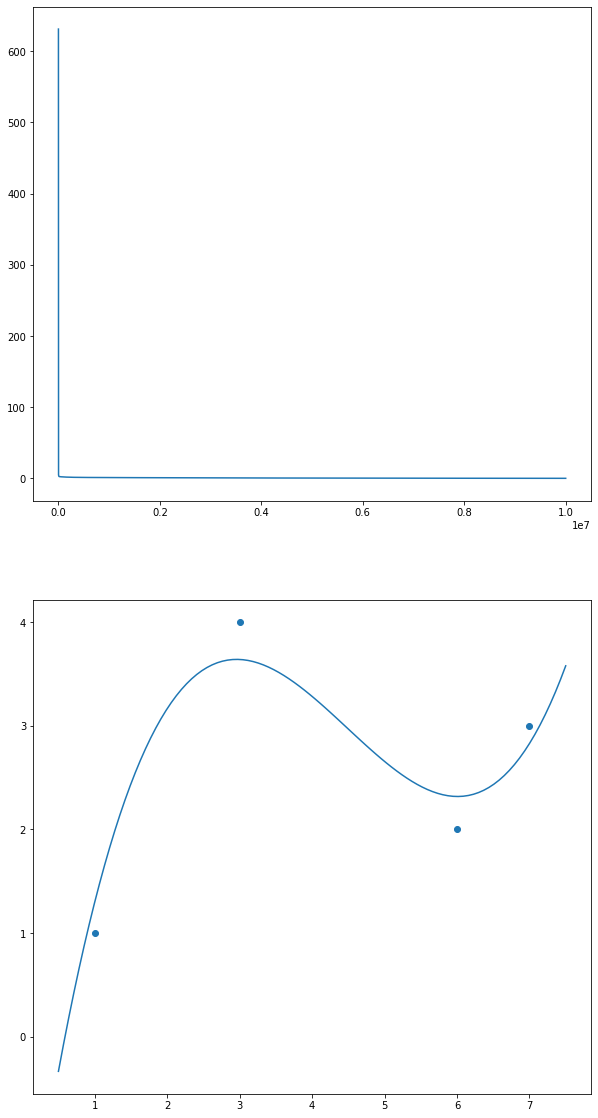

In [3]:
newFig = plt.figure(figsize=(10,20))

axs1 = newFig.add_subplot(2, 1, 1)
axs1.plot( developmentL )

xRange = np.linspace(0.5, 7.5, 100)
axs2 = newFig.add_subplot(2, 1, 2)
axs2.scatter( *zip(*points) )
axs2.plot( xRange, polyRes(coeffs, xRange) )